<a href="https://colab.research.google.com/github/desunny/steel-ml/blob/dev/%EC%95%95%EC%97%B0%EA%B3%B5%EC%A0%95_%EC%9D%B4%EC%83%81%ED%83%90%EC%A7%80(on).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
* 최초 작성일 : 2022.06.09
* 최종 수정일 : 2022.06.17
---

#**1.개요 및 데이터 불러오기**

##**1-1.개요**

 * 이상탐지(Anomaly detection)란?

    * 데이터 안에서 anomaly, outlier, abnormal과 같이 예상하지 못한 패턴을 찾는 일련의 활동을 말합니다.

 * 실습목표
   * 압연설비 센서(sensor) 데이터를 사용해 제품 품질>(정상/비정상)의 이상탐지를 위한 분석모형을 실습한다.

 * 실습내용
   * 분석 데이터 로드, 탐색적 데이터 분석(EDA), 시각화를 통한 데이터 특성 파악.
   *   데이터 분리(train, test)    
   *   이상탐지(AutoEncoder) 모델구성 및 학습.

 * 실습 데이터

   * 압연은 제강공정을 거친 소재에 회전하는 압연기 사이를 통과하는 압력에 의하여 두께와 단면적을 감소 시키고, 길이를 늘리는 소성가공방법이다.

   * 실습데이터는 센서데이터 10개와 라벨데이터 만으로 구성하였다. 참고로, 보다 정확한 이상탐지를 위해서는 더 많은 센서 데이터와 압연 후 측정된 환봉의 두께 데이터를 활용할 수 있다.

   * 라벨데이터는 환봉의 목표수치를 오차 허용범위 내에서 만족하는지 여부에 따라서 정상과 비정상으로 생성하였다. 환봉의 목표 수치는 90mm 이고, 오차 허용범위는 $\pm$1mm를 기준으로 삼았다.(정상:1, 비정상:0)   

* 데이터 구성

  * 데이터는 csv파일 3,400개의 데이터로 구성 되어 있다.

| 컬럼      | 용도                      |
|-----------|---------------------------|
| sensor_1  | 센서_1 데이터             |
| sensor_2  | 센서_2 데이터             |
| sensor_3  | 센서_3 데이터             |
| . ..      | ...                       |
| sensor_9 | 센서_9 데이터            |
| sensor_10 | 센서_10 데이터            |
| label     | 정상(1),비정상(0)여부     |






In [ ]:
#data clone
!git clone https://github.com/desunny/steel-ml/

fatal: destination path 'steel-ml' already exists and is not an empty directory.


In [ ]:
#자주 사용하는 라이브러리 임포트 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#소숫점 자리수 표시 방법 지정 
pd.options.display.float_format = '{:.5f}'.format

#경고메세지 제거 
import warnings
warnings.filterwarnings('ignore')

## 1-2. 데이터 불러오기

In [ ]:
# 데이터 불러오기
location = "./steel-ml/datasets/steel_ai_03_on.csv"
df = pd.read_csv(location, header=0)
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,label
0,12.76411,11.49163,10.49584,10.21551,9.14900,10.58604,8.17434,8.59743,11.84749,8.14485,1
1,10.45196,12.65341,12.81982,13.50285,10.74295,11.42360,12.97196,11.77719,9.72817,7.25627,1
2,12.27593,10.40335,11.90628,11.77770,10.90694,12.61421,12.03149,13.55872,11.80927,11.89388,1
3,12.06943,9.56267,11.76172,12.30023,10.44920,13.60143,13.70954,10.64105,10.44456,12.83846,1
4,10.96392,11.28788,10.43547,13.11737,12.12428,10.89717,10.24463,11.36329,11.50155,11.80204,1


##1-3.데이터 확인




* 데이터셋 정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_1   3400 non-null   float64
 1   sensor_2   3400 non-null   float64
 2   sensor_3   3400 non-null   float64
 3   sensor_4   3400 non-null   float64
 4   sensor_5   3400 non-null   float64
 5   sensor_6   3400 non-null   float64
 6   sensor_7   3400 non-null   float64
 7   sensor_8   3400 non-null   float64
 8   sensor_9   3400 non-null   float64
 9   sensor_10  3400 non-null   float64
 10  label      3400 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 292.3 KB


* 데이터 형태 및 요약정보 확인

In [ ]:
print(df.shape) # 데이터 행과열
df.describe(include='all').T # 데이터 요약 정보 

(3400, 11)


,count,mean,std,min,25%,50%,75%,max
sensor_1,3400.00000,11.39115,1.35528,6.35608,10.52974,11.49532,12.42500,14.73135
sensor_2,3400.00000,11.48866,1.48368,5.70008,10.69674,11.63229,12.59696,14.56107
sensor_3,3400.00000,11.47649,1.57640,5.80968,10.70578,11.68336,12.65753,15.24716
sensor_4,3400.00000,11.38348,1.74099,5.60198,10.61089,11.64442,12.62799,14.84943
sensor_5,3400.00000,11.18524,1.87517,5.16556,10.29060,11.48869,12.56961,15.24944
sensor_6,3400.00000,10.99852,1.88230,5.14260,9.99334,11.27507,12.39994,14.94281
sensor_7,3400.00000,10.91746,1.81211,4.78578,9.90023,11.16038,12.23420,14.78861
sensor_8,3400.00000,11.00919,1.67586,4.66189,10.01450,11.19943,12.22752,15.59032
sensor_9,3400.00000,11.14139,1.65594,4.47711,10.11527,11.26711,12.34856,15.13125
sensor_10,3400.00000,10.40251,1.62589,4.64467,9.33719,10.46571,11.57678,15.91158


* 데이터 null값 확인

In [ ]:
df.isnull().sum()   #데이터 null값 확인(합계) 


sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
label        0
dtype: int64

# **2. 데이터 탐색** <br>

---
데이터 탐색 파트는 아래 순서로 진행됨<br>
2-1. 분포 확인<br>
2-2. 종속변수 생성<br>

---

## 2-1. 분포확인

* 시각화 및 분석을 위한 컬럼명 변수저장

In [ ]:
# sensor_cols length 
len_of_sensor_cols = (len(df.T))

# 시각화를 위한 컬럼명 변수저장
# 센서 컬럼 리스트
sensor_cols = []
for x in range(1,len_of_sensor_cols):
    sensor_cols.append('sensor_'+str(x))
print('sensor_cols : ',sensor_cols)

# 지름측정 컬럼 리스트
label = ['label']
print('label : ',label)

sensor_cols :  ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10']
label :  ['label']


* 센서의 분포

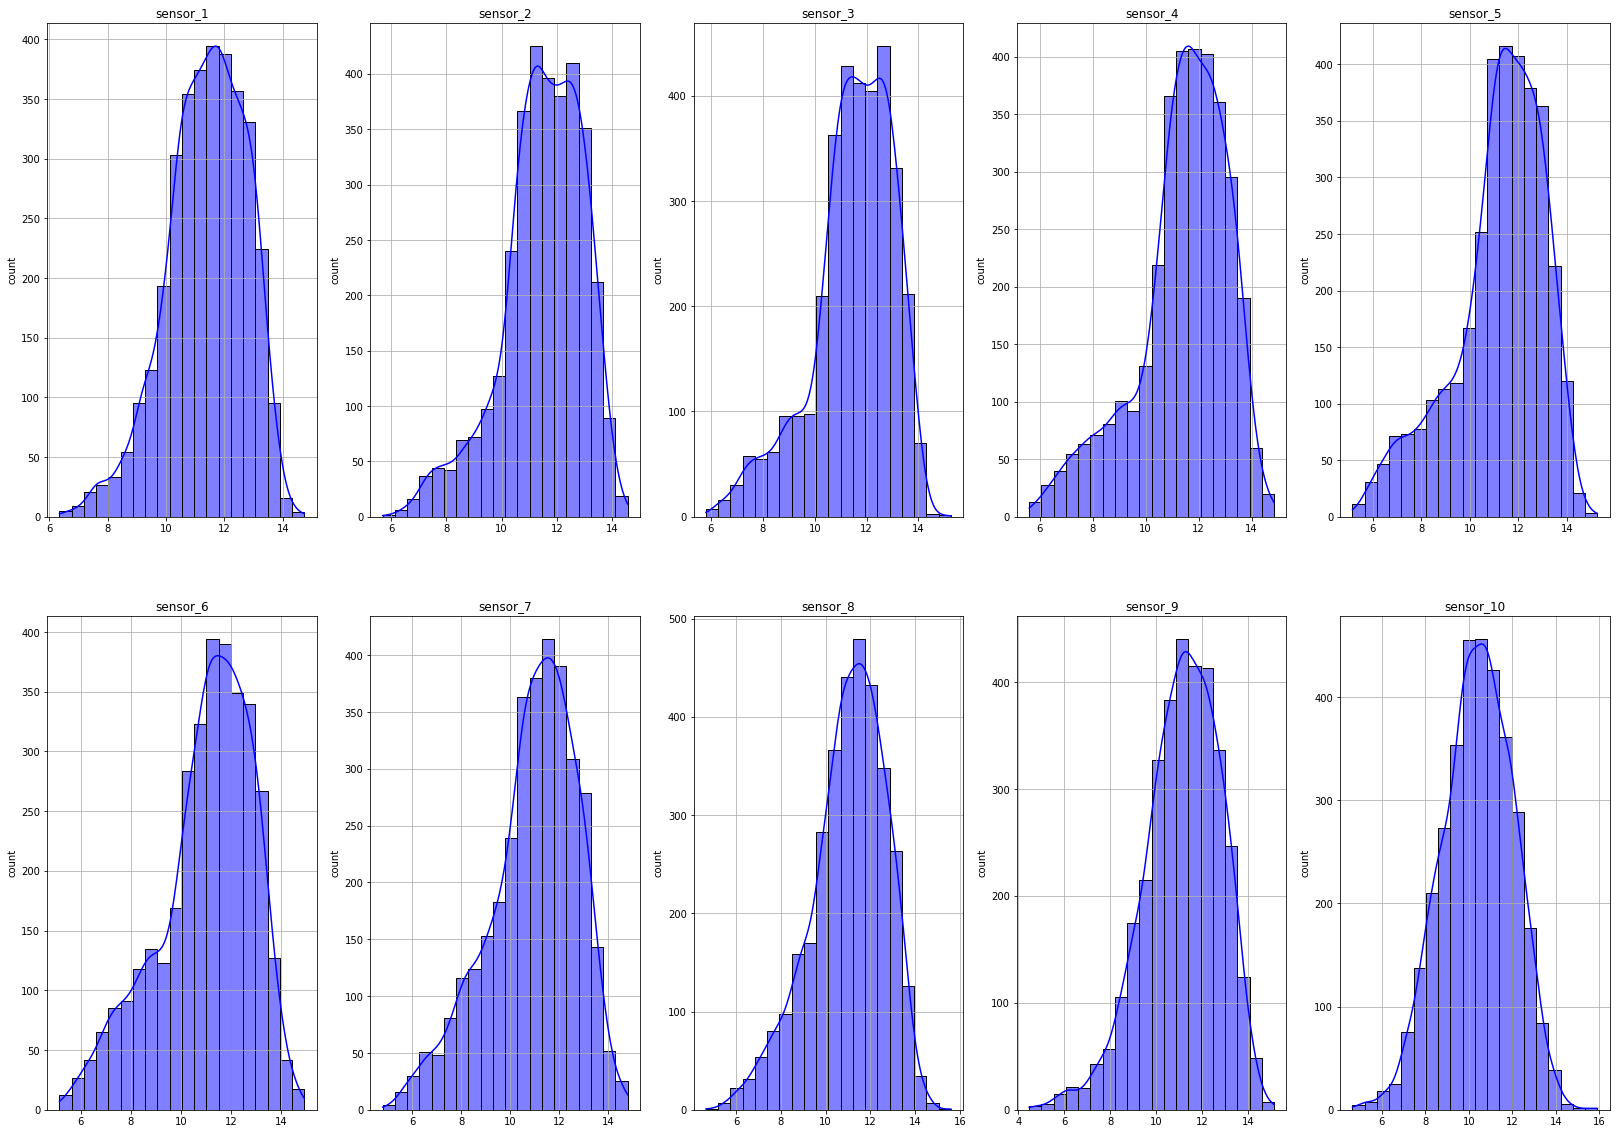

In [ ]:
f, axes = plt.subplots(2, 5, figsize=(28, 20))
col_no = 0
for x in range(0,2):
    for y in range(0,5):
        ax = sns.histplot(df[sensor_cols[col_no]], bins=20,  color="blue", alpha=0.5, kde=True, ax=axes[x, y])
        ax.grid(b=True)
        ax.set(xlabel="",ylabel="count" ,title=sensor_cols[col_no])
        col_no +=1
        

* label의 분포

,1,0
label,2833,567


([<matplotlib.patches.Wedge at 0x7f8585fbe1d0>,
 [Text(-0.952458550050434, 0.55029329492174, 'Normal'),
  Text(0.9524586015726061, -0.5502932057461328, 'Anomaly')],
 [Text(-0.5195228454820549, 0.3001599790482217, '83%'),
  Text(0.5195228735850578, -0.30015993040698147, '17%')])

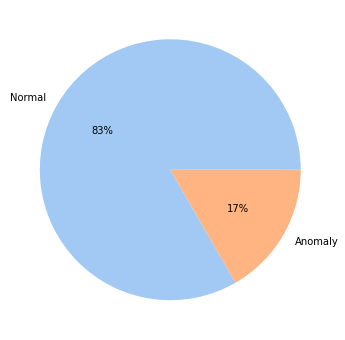

In [ ]:
labels = ['Normal','Anomaly']
value_df = pd.DataFrame(df['label'].value_counts())
display(value_df.T)

plt.figure(figsize = (6, 6))
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(value_df.T, labels = labels, colors = colors, autopct='%.0f%%')

* 센서 boxplot  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

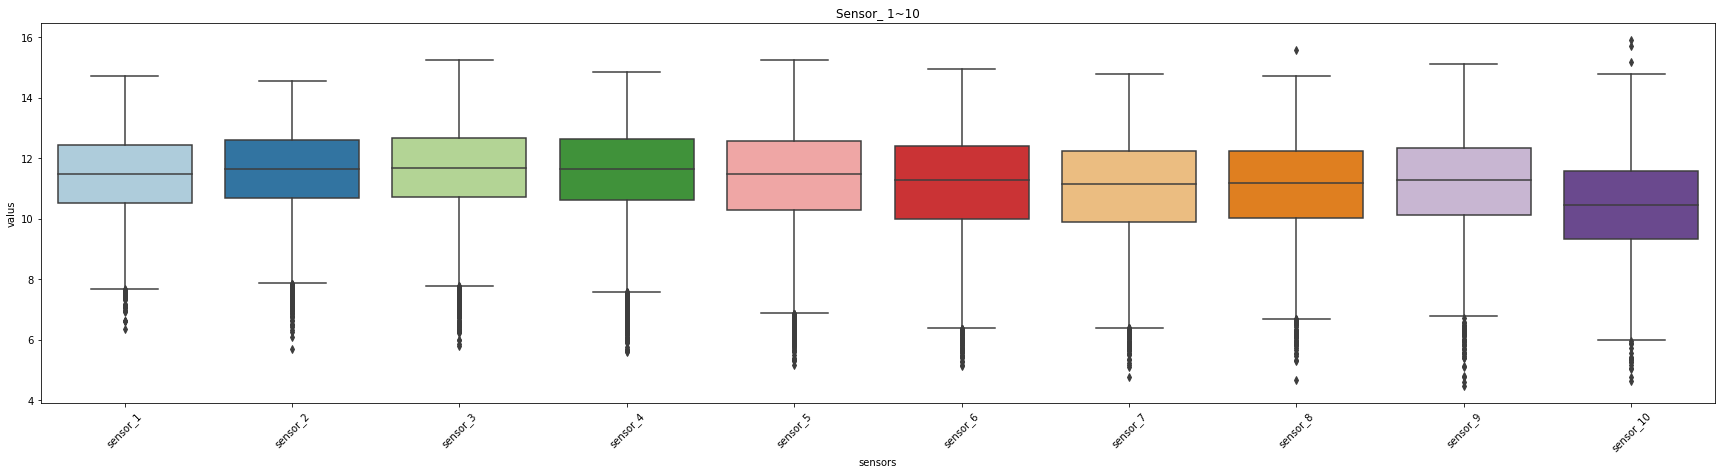

In [ ]:
# senosr_1~sensor_10 의 boxplot
plt.figure(figsize = (30, 7))
ax = sns.boxplot(data=df[sensor_cols], palette = 'Paired')
ax.set(xlabel="sensors", ylabel="valus",title='Sensor_ 1~10')
plt.xticks(rotation=45)

##2-2.정상 & 이상 분포 확인

In [ ]:
#전체 데이터에서 정상, 비정상 데이터 분리하기 
normal_df = df[df['label']==1]
abnormal_df = df[df['label']==0]


display(df.describe())
display('--')
display(normal_df.describe())
display('--')
display(abnormal_df.describe())

#센서1~9 까지의 평균값이 10 이하인 경우 비정상이 많음. min값이 적을 수록 abnormal일 가능성이 높음 

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,label
count,3400.00000,3400.00000,3400.00000,3400.00000,3400.00000,3400.00000,3400.00000,3400.00000,3400.00000,3400.00000,3400.00000
mean,11.39115,11.48866,11.47649,11.38348,11.18524,10.99852,10.91746,11.00919,11.14139,10.40251,0.83324
std,1.35528,1.48368,1.57640,1.74099,1.87517,1.88230,1.81211,1.67586,1.65594,1.62589,0.37282
min,6.35608,5.70008,5.80968,5.60198,5.16556,5.14260,4.78578,4.66189,4.47711,4.64467,0.00000
25%,10.52974,10.69674,10.70578,10.61089,10.29060,9.99334,9.90023,10.01450,10.11527,9.33719,1.00000
50%,11.49532,11.63229,11.68336,11.64442,11.48869,11.27507,11.16038,11.19943,11.26711,10.46571,1.00000
75%,12.42500,12.59696,12.65753,12.62799,12.56961,12.39994,12.23420,12.22752,12.34856,11.57678,1.00000
max,14.73135,14.56107,15.24716,14.84943,15.24944,14.94281,14.78861,15.59032,15.13125,15.91158,1.00000


'--'

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,label
count,2833.00000,2833.00000,2833.00000,2833.00000,2833.00000,2833.00000,2833.00000,2833.00000,2833.00000,2833.00000,2833.00000
mean,11.69176,11.88962,11.94560,11.91722,11.75243,11.54112,11.40032,11.39413,11.47471,10.38398,1.00000
std,1.10853,1.07442,1.07738,1.16857,1.28795,1.37443,1.38039,1.36332,1.40012,1.57592,0.00000
min,7.88798,8.41477,7.89510,7.72516,7.30832,7.02279,6.24133,5.82104,5.60175,4.75929,1.00000
25%,10.87043,11.07174,11.14163,11.08989,10.91425,10.64421,10.51528,10.52126,10.51659,9.32574,1.00000
50%,11.73068,11.90364,11.95818,11.92226,11.80002,11.62335,11.46201,11.46913,11.51979,10.43563,1.00000
75%,12.55844,12.72529,12.77993,12.80663,12.73611,12.57890,12.39773,12.38066,12.50465,11.51619,1.00000
max,14.73135,14.56107,15.24716,14.84943,15.24944,14.94281,14.78861,14.70930,15.13125,14.60814,1.00000


'--'

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,label
count,567.00000,567.00000,567.00000,567.00000,567.00000,567.00000,567.00000,567.00000,567.00000,567.00000,567.00000
mean,9.88920,9.48528,9.13258,8.71667,8.35129,8.28743,8.50486,9.08582,9.47601,10.49511,0.00000
std,1.47302,1.61806,1.58443,1.67909,1.77779,1.72874,1.78547,1.76592,1.82327,1.85428,0.00000
min,6.35608,5.70008,5.80968,5.60198,5.16556,5.14260,4.78578,4.66189,4.47711,4.64467,0.00000
25%,8.92351,8.25148,7.96130,7.52630,7.01270,7.08708,7.25023,7.73099,8.32408,9.41385,0.00000
50%,9.81043,9.35556,9.01940,8.55432,8.04731,7.97391,8.25577,9.00214,9.49649,10.59224,0.00000
75%,10.84699,10.51809,10.07584,9.49801,9.26446,9.01186,9.52182,10.25650,10.63974,11.91248,0.00000
max,14.26611,14.08335,14.08239,14.09881,13.69334,14.11889,14.20795,15.59032,14.42669,15.91158,0.00000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

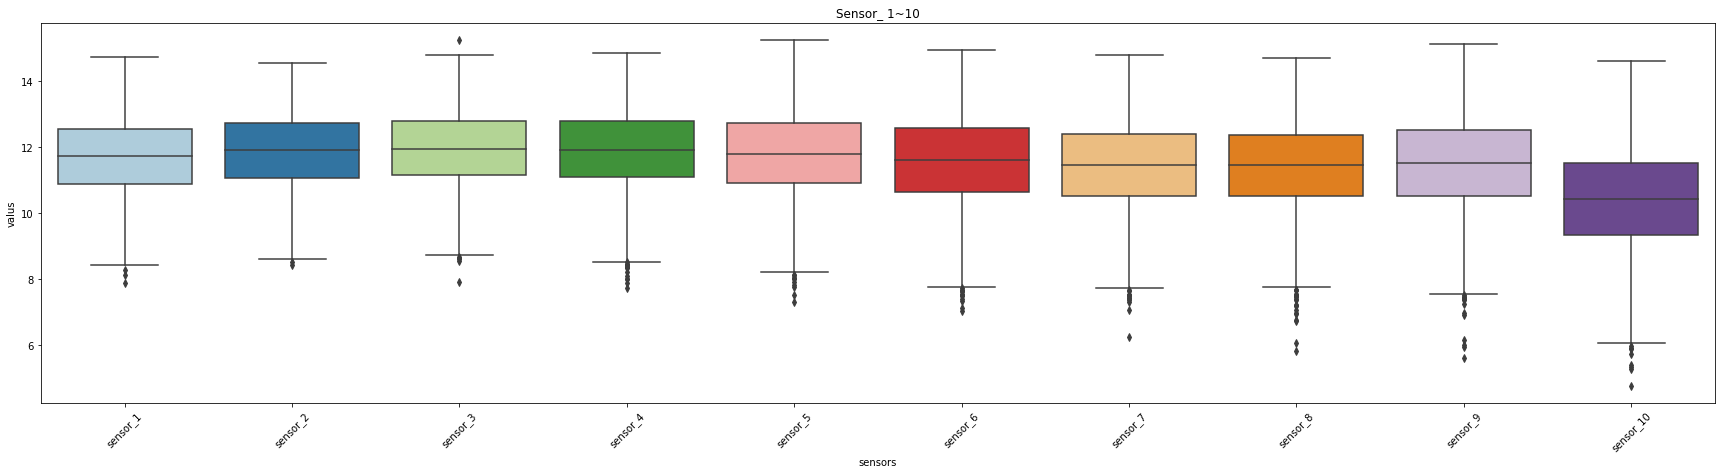

In [ ]:
# normal senosr_1~sensor_10 의 boxplot
plt.figure(figsize = (30, 7))
ax = sns.boxplot(data=normal_df[sensor_cols], palette = 'Paired')
ax.set(xlabel="sensors", ylabel="valus",title='Sensor_ 1~10')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

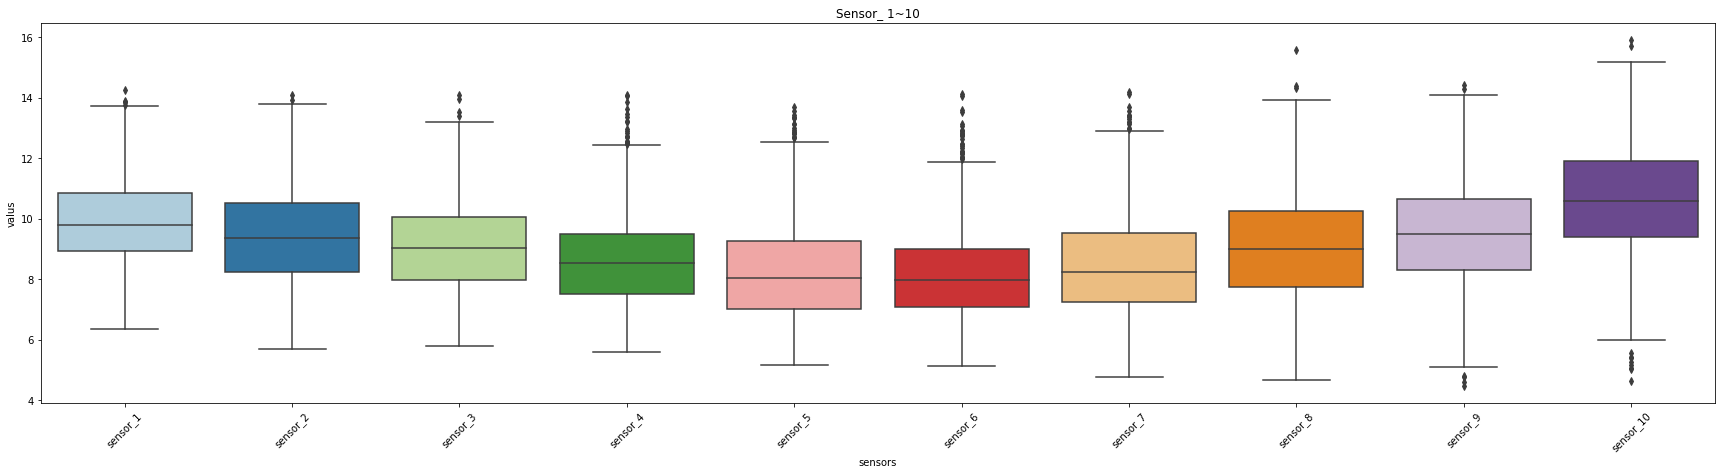

In [ ]:
# abnormal senosr_1~sensor_10 의 boxplot
plt.figure(figsize = (30, 7))
ax = sns.boxplot(data=abnormal_df[sensor_cols], palette = 'Paired')
ax.set(xlabel="sensors", ylabel="valus",title='Sensor_ 1~10')
plt.xticks(rotation=45)

# **3. 모델링 및 평가** <br>

### 3-1. 훈련, 테스트 데이터 분리

In [ ]:
#모델링 라이브러리 임포트 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# 데이터의 값만 저장
raw_data = df.values

# 라벨 데이터 분리 (정상:1 비정상:0)
labels = raw_data[:, -1]

# 센서 데이터분리(sensor_1 ~ sensor_10)
sensors = raw_data[:, 0:10]

# train, test 분리
x_train, x_test, y_train, y_test = train_test_split(
    sensors, labels, test_size=0.2, random_state=22, stratify = labels)

print('x_train data shape:',x_train.shape)
print('x_test data shape:',x_test.shape)

print('y_train label shape:',y_train.shape)
print('y_test label shape:',y_test.shape)

train data shape: (2720, 10)
test data shape: (680, 10)
train label shape: (2720,)
test label shape: (680,)


In [ ]:
x_train

array([[10.621635  , 11.51357255, 13.00192118, ..., 11.18955512,
        11.45453227, 11.37775435],
       [10.50113845,  8.4175035 , 10.13849328, ...,  9.17390195,
         9.18624216,  9.67071534],
       [11.9469402 , 11.32738557, 10.89104661, ..., 10.97722645,
        11.30127519,  7.99531569],
       ...,
       [11.69957014, 10.87135857, 11.96209793, ..., 12.71361494,
        12.45061129, 11.24143845],
       [12.11167061, 12.57821342, 11.19259501, ..., 12.92257274,
        12.45554804,  7.75500925],
       [11.06389909, 12.22464865, 10.77148065, ..., 11.37956032,
        12.0253437 , 12.34646878]])

* 데이터 정규화

>모델의 학습성능을 높이기 위하여 일정한 범위 [0,1] 로 정규화.





In [ ]:
# MinMax 스케일링
scaler = MinMaxScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.transform(x_test)


In [ ]:
display(x_train)
display('--------------'*10)
display(x_test)

array([[10.621635  , 11.51357255, 13.00192118, ..., 11.18955512,
        11.45453227, 11.37775435],
       [10.50113845,  8.4175035 , 10.13849328, ...,  9.17390195,
         9.18624216,  9.67071534],
       [11.9469402 , 11.32738557, 10.89104661, ..., 10.97722645,
        11.30127519,  7.99531569],
       ...,
       [11.69957014, 10.87135857, 11.96209793, ..., 12.71361494,
        12.45061129, 11.24143845],
       [12.11167061, 12.57821342, 11.19259501, ..., 12.92257274,
        12.45554804,  7.75500925],
       [11.06389909, 12.22464865, 10.77148065, ..., 11.37956032,
        12.0253437 , 12.34646878]])

'--------------------------------------------------------------------------------------------------------------------------------------------'

array([[11.86269191, 13.72895127, 12.75621047, ..., 12.40919119,
        10.38493079, 11.50387046],
       [11.25541217,  9.32097651,  8.50263875, ...,  9.17451744,
         8.54147472, 10.12843816],
       [10.86183235, 10.94718686, 13.2983034 , ..., 12.7912335 ,
        10.91427061,  9.18205507],
       ...,
       [12.90194623, 11.40180111, 12.18182023, ..., 11.80929869,
        10.3677424 ,  9.02614413],
       [10.15864433,  9.31628527,  9.63311998, ..., 12.28429704,
        12.04797569, 12.21597212],
       [10.42361153, 11.22125265, 10.51388401, ..., 10.57948483,
        11.60325488,  9.969149  ]])

##3-2.모델 학습 및 평가

In [ ]:
#모델 임포트 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

###3-2.1 로지스틱 리그레션 


In [ ]:
#로지스틱 리그레션 훈련 
lr = LogisticRegression(random_state=1234)
lr.fit(x_train, y_train)

LogisticRegression(random_state=1234)

In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [ ]:
lr_train_report =  classification_report(y_train, y_pred_train)
lr_test_report = classification_report(y_test, y_pred_test)

print(lr_train_report)
print('**'*50)
print(lr_test_report)


              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93       454
         1.0       0.98      1.00      0.99      2266

    accuracy                           0.98      2720
   macro avg       0.99      0.94      0.96      2720
weighted avg       0.98      0.98      0.98      2720

****************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       113
         1.0       0.97      0.99      0.98       567

    accuracy                           0.96       680
   macro avg       0.95      0.92      0.93       680
weighted avg       0.96      0.96      0.96       680



###3-2.2 SVM

In [ ]:
svc = SVC(random_state=1234)
svc.fit(x_train, y_train)

SVC(random_state=1234)

In [ ]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

In [ ]:
sv_train_report =  classification_report(y_train, y_pred_train)
sv_test_report = classification_report(y_test, y_pred_test)

print(sv_train_report)
print('**'*50)
print(sv_test_report)


              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91       454
         1.0       0.97      1.00      0.98      2266

    accuracy                           0.97      2720
   macro avg       0.98      0.92      0.95      2720
weighted avg       0.97      0.97      0.97      2720

****************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       113
         1.0       0.98      0.99      0.98       567

    accuracy                           0.97       680
   macro avg       0.96      0.93      0.95       680
weighted avg       0.97      0.97      0.97       680



###3-2.3 랜덤포레스트

In [ ]:
rfc = RandomForestClassifier(random_state=1234)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=1234)

In [ ]:
#예측 
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)


In [ ]:
rf_train_report =  classification_report(y_train, y_pred_train)
rf_test_report = classification_report(y_test, y_pred_test)

print(rf_train_report)
print('**'*50)
print(rf_test_report)

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93       454
         1.0       0.98      1.00      0.99      2266

    accuracy                           0.98      2720
   macro avg       0.99      0.94      0.96      2720
weighted avg       0.98      0.98      0.98      2720

****************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       113
         1.0       0.97      0.99      0.98       567

    accuracy                           0.96       680
   macro avg       0.95      0.92      0.93       680
weighted avg       0.96      0.96      0.96       680



##3.3 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [400,500], 
    'max_depth' : [6, 8, 10, 12]
}

rf_clf = RandomForestClassifier(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy')
grid_cv.fit(x_train, y_train)


print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'n_estimators': 400}
최고 예측 정확도: 0.9676


In [ ]:
# ▶ Best score 파라미터로 다시 재학습
rfc = RandomForestClassifier(n_estimators=400, max_depth=6, random_state = 1234)
rfc.fit(x_train, y_train)

# ▶ 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)


rf_train_report =  classification_report(y_train, y_pred_train)
rf_test_report = classification_report(y_test, y_pred_test)


In [ ]:
rf_train_report =  classification_report(y_train, y_pred_train)
rf_test_report = classification_report(y_test, y_pred_test)

print(rf_train_report)
print('**'*50)
print(rf_test_report)

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93       454
         1.0       0.98      1.00      0.99      2266

    accuracy                           0.98      2720
   macro avg       0.99      0.94      0.96      2720
weighted avg       0.98      0.98      0.98      2720

****************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       113
         1.0       0.97      0.99      0.98       567

    accuracy                           0.96       680
   macro avg       0.95      0.92      0.93       680
weighted avg       0.96      0.96      0.96       680



##3.4 3가지 모델 성능 비교

In [ ]:
print('############## 모델 성능 비교 ##############') 
print('############## 1. 로지스틱 회귀 ##############')
print(lr_test_report)

print('############## 2. SVM ##############')
print(sv_test_report)

print('############## 3. RandomForest ##############')
print(rf_test_report)


############## 모델 성능 비교 ##############
############## 1. 로지스틱 회귀 ##############
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       113
         1.0       0.97      0.99      0.98       567

    accuracy                           0.96       680
   macro avg       0.95      0.92      0.93       680
weighted avg       0.96      0.96      0.96       680

############## 2. SVM ##############
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       113
         1.0       0.98      0.99      0.98       567

    accuracy                           0.97       680
   macro avg       0.96      0.93      0.95       680
weighted avg       0.97      0.97      0.97       680

############## 3. RandomForest ##############
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       113
         1.0       0.97      0.99      0.98       567

    accuracy       